Shape: (1362, 10)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         1362 non-null   object 
 1   title            1362 non-null   object 
 2   city             1357 non-null   object 
 3   bedrooms         1362 non-null   int64  
 4   bathrooms        1362 non-null   int64  
 5   price            1362 non-null   float64
 6   rating           1362 non-null   float64
 7   review_count     1362 non-null   int64  
 8   amenities_count  1362 non-null   int64  
 9   last_scraped     1362 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 106.5+ KB
None

First 5 rows:
  platform                           title    city  bedrooms  bathrooms  \
0   airbnb             Apartment in Beirut  Beirut         1          1   
1  Stayinn  Amine 601, 1-BR in Mar Mikhael  Beirut         1          1   
2  Stay

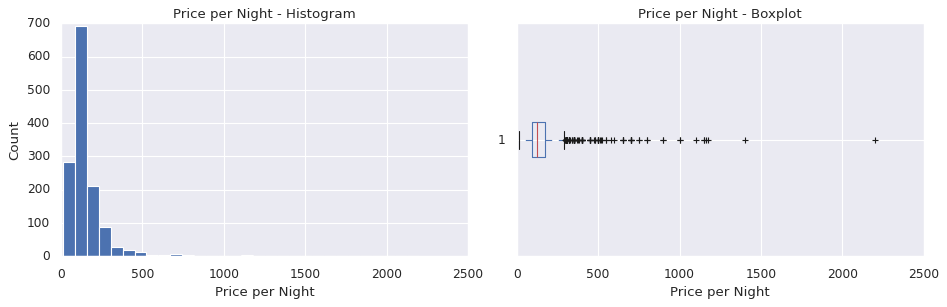

Price stats:
count    1362.000000
mean      158.385148
std       140.532692
min        14.800000
25%        93.000000
50%       125.000000
75%       173.000000
max      2200.000000
Name: price, dtype: float64


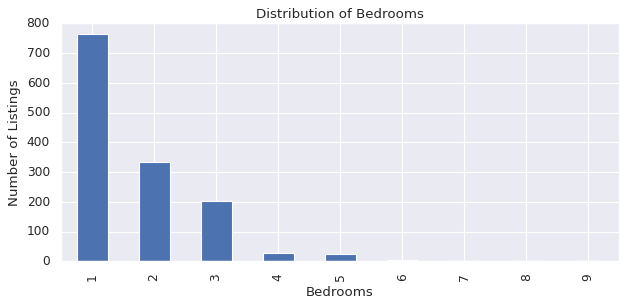

Bedrooms stats:
count    1362.000000
mean        1.723935
std         1.043577
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: bedrooms, dtype: float64


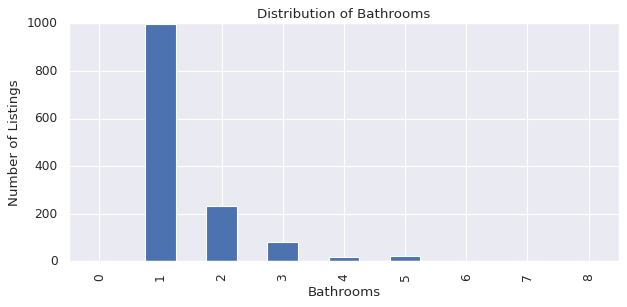

Bathrooms stats:
count    1362.000000
mean        1.428781
std         0.893931
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: bathrooms, dtype: float64


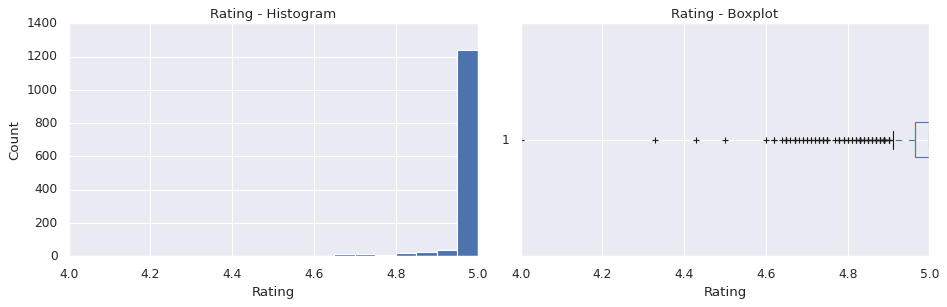

Rating stats:
count    1362.000000
mean        4.963635
std         0.065416
min         4.000000
25%         4.963635
50%         4.963635
75%         5.000000
max         5.000000
Name: rating, dtype: float64


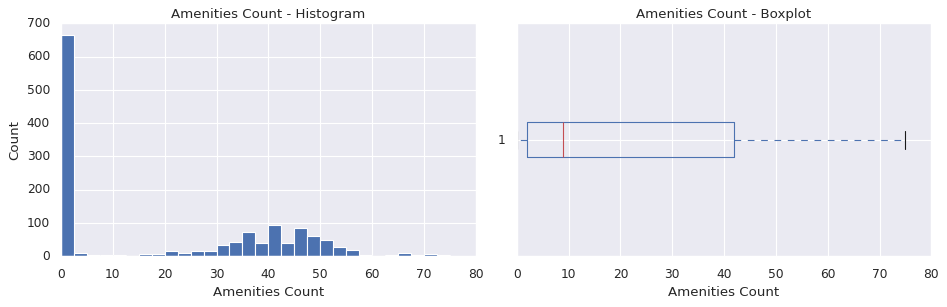

Amenities count stats:
count    1362.000000
mean       21.635830
std        21.336728
min         0.000000
25%         2.000000
50%         9.000000
75%        42.000000
max        75.000000
Name: amenities_count, dtype: float64


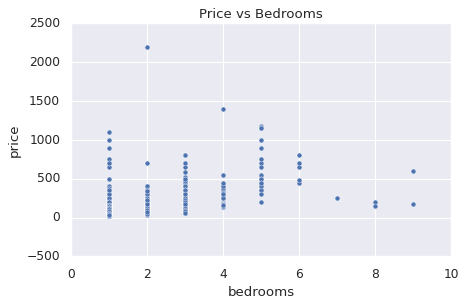

Correlation between bedrooms and price: 0.472



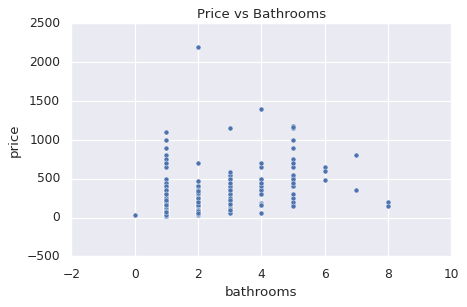

Correlation between bathrooms and price: 0.486



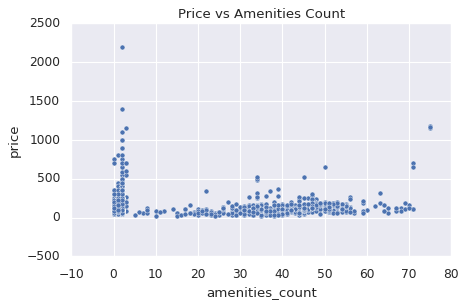

Correlation between amenities_count and price: -0.155



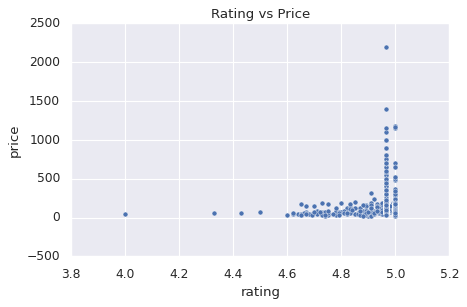

Correlation between rating and price: 0.097



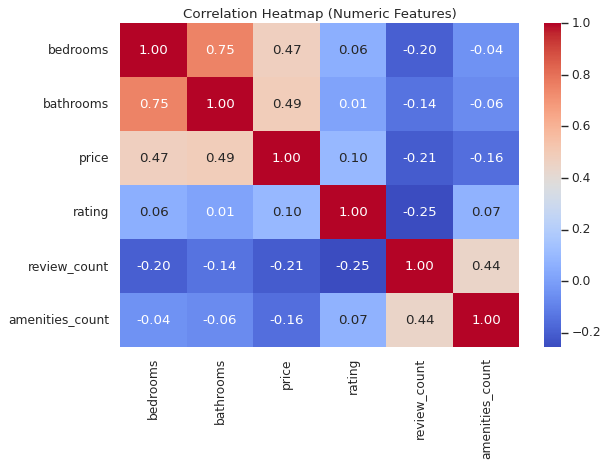


Correlation matrix:
                 bedrooms  bathrooms     price    rating  review_count  \
bedrooms         1.000000   0.753134  0.471695  0.057461     -0.196497   
bathrooms        0.753134   1.000000  0.485750  0.011769     -0.138806   
price            0.471695   0.485750  1.000000  0.096756     -0.207178   
rating           0.057461   0.011769  0.096756  1.000000     -0.254520   
review_count    -0.196497  -0.138806 -0.207178 -0.254520      1.000000   
amenities_count -0.044644  -0.063844 -0.155453  0.071038      0.442901   

                 amenities_count  
bedrooms               -0.044644  
bathrooms              -0.063844  
price                  -0.155453  
rating                  0.071038  
review_count            0.442901  
amenities_count         1.000000  

Platform value counts:
platform
LebanonRental    675
Stayinn          430
airbnb           257
Name: count, dtype: int64

Mean stats per platform:
                    price  bedrooms  bathrooms  amenities_count    

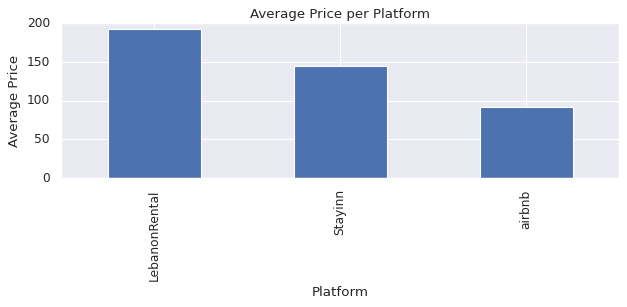

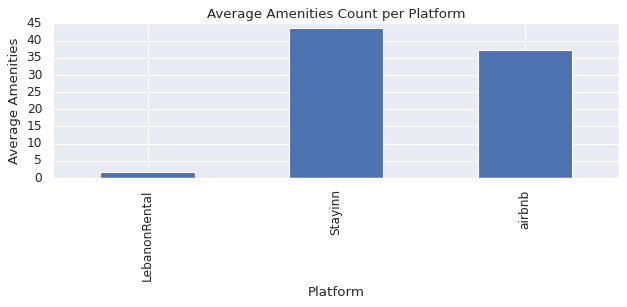

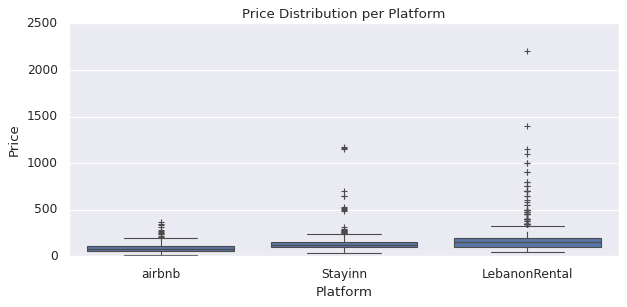


Top 10 cities by number of listings:
city
Beirut       320
Batroun      291
Keserouan    188
Byblos        97
Faqra         45
Berbara       41
Aley          38
Chouf         36
Bcharre       27
El Meten      20
Name: count, dtype: int64


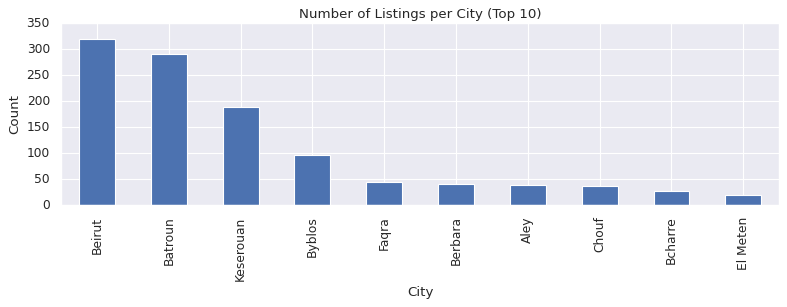

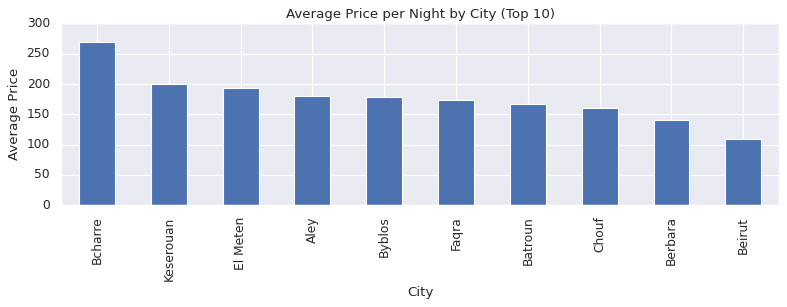


Price IQR outlier bounds: [-27.00, 293.00]
Number of price outliers: 114

Top 10 most expensive listings:
           platform                                              title  \
1299  LebanonRental                     Chalet for Rent in Kafardebein   
1248  LebanonRental      A One-of-a-Kind Château in Bejdarfel, Batroun   
571         Stayinn            La Villa Marée - 5BR, w/ Pool - Batroun   
586         Stayinn            La Villa Marée - 5BR, w/ Pool - Batroun   
1111  LebanonRental                             Luxury Berbara Mansion   
569         Stayinn            La Villa Marée - 5BR, w/ Pool - Batroun   
1007  LebanonRental  Mountain Luxury: Exclusive 2-Bedroom Suites in...   
962   LebanonRental                                   Kayfun 5BR Villa   
1133  LebanonRental                Mechmech Retreat: Guesthouse Escape   
863   LebanonRental                      Wej El Hajar 5 Bedrooms Villa   

                                                   city   price  
1299        

In [1]:
# ============================================
# 1. Imports & Setup
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots a bit nicer
plt.style.use("classic")
sns.set_theme()

# ============================================
# 2. Load Data
# ============================================

# If running in Colab: upload the CSV then use the correct path/name
# Example if you upload: `cleaned_scraping_project.csv`
df = pd.read_csv("cleaned_scraping_project.csv")

print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# ============================================
# 3. Check Missing Values & Basic Stats
# ============================================

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nDescriptive statistics for numeric columns:")
print(df.describe())

# ============================================
# 4. Univariate Analysis
#    (Price, Bedrooms, Bathrooms, Rating, Amenities)
# ============================================

# Helper: function to show hist + boxplot
def hist_and_box(series, title, bins=30):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    axes[0].hist(series.dropna(), bins=bins)
    axes[0].set_title(f"{title} - Histogram")
    axes[0].set_xlabel(title)
    axes[0].set_ylabel("Count")

    # Boxplot
    axes[1].boxplot(series.dropna(), vert=False)
    axes[1].set_title(f"{title} - Boxplot")
    axes[1].set_xlabel(title)

    plt.tight_layout()
    plt.show()


# ---- 4.1 Price per night ----
hist_and_box(df["price"], "Price per Night")

print("Price stats:")
print(df["price"].describe())

# ---- 4.2 Bedrooms ----
plt.figure(figsize=(8,4))
df["bedrooms"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()

print("Bedrooms stats:")
print(df["bedrooms"].describe())

# ---- 4.3 Bathrooms ----
plt.figure(figsize=(8,4))
df["bathrooms"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()

print("Bathrooms stats:")
print(df["bathrooms"].describe())

# ---- 4.4 Rating ----
hist_and_box(df["rating"], "Rating", bins=20)
print("Rating stats:")
print(df["rating"].describe())

# ---- 4.5 Amenities Count ----
hist_and_box(df["amenities_count"], "Amenities Count", bins=30)
print("Amenities count stats:")
print(df["amenities_count"].describe())

# ============================================
# 5. Bivariate Analysis (Relationships)
# ============================================

# Helper: scatter + correlation text
def scatter_with_corr(x, y, data, title):
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=x, y=y, data=data)
    plt.title(title)
    plt.tight_layout()
    plt.show()

    corr = data[[x, y]].corr().iloc[0,1]
    print(f"Correlation between {x} and {y}: {corr:.3f}\n")


# ---- 5.1 Price vs Bedrooms ----
scatter_with_corr("bedrooms", "price", df, "Price vs Bedrooms")

# ---- 5.2 Price vs Bathrooms ----
scatter_with_corr("bathrooms", "price", df, "Price vs Bathrooms")

# ---- 5.3 Price vs Amenities Count ----
scatter_with_corr("amenities_count", "price", df, "Price vs Amenities Count")

# ---- 5.4 Rating vs Price (optional) ----
scatter_with_corr("rating", "price", df, "Rating vs Price")

# ============================================
# 6. Correlation Heatmap
# ============================================

numeric_cols = ["bedrooms", "bathrooms", "price", "rating", "review_count", "amenities_count"]
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

print("\nCorrelation matrix:")
print(corr_matrix)

# ============================================
# 7. Platform-Level Comparison
#    (Airbnb vs Stayinn vs Lebanon Rental)
# ============================================

print("\nPlatform value counts:")
print(df["platform"].value_counts())

platform_stats = df.groupby("platform")[["price", "bedrooms", "bathrooms", "amenities_count", "rating"]].mean()

print("\nMean stats per platform:")
print(platform_stats)

# Bar plot: Average price per platform
plt.figure(figsize=(8,4))
platform_stats["price"].plot(kind="bar")
plt.title("Average Price per Platform")
plt.xlabel("Platform")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()

# Bar plot: Average amenities per platform
plt.figure(figsize=(8,4))
platform_stats["amenities_count"].plot(kind="bar")
plt.title("Average Amenities Count per Platform")
plt.xlabel("Platform")
plt.ylabel("Average Amenities")
plt.tight_layout()
plt.show()

# Optional: boxplot of price per platform (to show spread)
plt.figure(figsize=(8,4))
sns.boxplot(x="platform", y="price", data=df)
plt.title("Price Distribution per Platform")
plt.xlabel("Platform")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

# ============================================
# 8. City-Level Analysis
# (only if city column is useful enough)
# ============================================

print("\nTop 10 cities by number of listings:")
print(df["city"].value_counts().head(10))

# Listings per city (top 10)
top_cities = df["city"].value_counts().head(10).index
df_top_cities = df[df["city"].isin(top_cities)]

plt.figure(figsize=(10,4))
df_top_cities["city"].value_counts().plot(kind="bar")
plt.title("Number of Listings per City (Top 10)")
plt.xlabel("City")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Average price per city (top 10)
city_price = df_top_cities.groupby("city")["price"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,4))
city_price.plot(kind="bar")
plt.title("Average Price per Night by City (Top 10)")
plt.xlabel("City")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()

# ============================================
# 9. Outlier Detection in Price
# ============================================

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nPrice IQR outlier bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")

outliers = df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]
print(f"Number of price outliers: {len(outliers)}")

# Optional: show the most expensive 10 listings
print("\nTop 10 most expensive listings:")
print(df.sort_values("price", ascending=False)[["platform", "title", "city", "price"]].head(10))

# ============================================
# 10. Short Text Summary Helper (for your report)
# ============================================

def summarize_for_report(df):
    print("\n--- Summary for the report (you can rephrase in nicer English) ---")

    print(f"Total listings after cleaning: {len(df)}")
    print(f"Average price per night: {df['price'].mean():.2f}")
    print(f"Median price per night: {df['price'].median():.2f}")

    print("\nMost common bedroom count:")
    print(df['bedrooms'].value_counts().head(5))

    print("\nHighest correlation with price:")
    corr = df[["price", "bedrooms", "bathrooms", "amenities_count", "rating", "review_count"]].corr()["price"].sort_values(ascending=False)
    print(corr)

summarize_for_report(df)
